# Stock Profits vs Unemployment
## Monthly closing Stock price and unemployeement rate (y-axis), Year, Month combined (x-axis) for 10 years by line plot

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import calendar
from scipy.stats import linregress
from pprint import pprint

# Import the API key
from api_keys import alpha_vantage_api_key, bls_api_key, fred_api_key

In [ ]:
# Do NOT EXECUTE, AS API has rate-Limiting, we will use yfinance, EXECUTE THE NEXT CELL

In [15]:
# Create a dataFrame for Nasdaq Monthly profit

import yfinance as yf
import pandas as pd
import calendar

stock_data = yf.download('QQQ', start='2014-01-01', end='2019-12-31', progress=False).reset_index()

# Date, Month Column creation by using Date
stock_data['Year'] = stock_data['Date'].dt.year
stock_data['Month_Number'] = stock_data['Date'].dt.month

# Close price for each Year, Month
monthly_data = stock_data.groupby(['Year', 'Month_Number'])
last_close = monthly_data['Close'].last().reset_index()

# dataFrame creation
monthly_close_df = pd.DataFrame({
                                    'Year': last_close['Year'],
                                    'Month_Number': last_close['Month_Number'],
                                    'Monthly_Close': last_close['Close']
                                })

# Generate month numbers (1-12)
month_numbers = list(range(1, 13))

# Use list comprehension to map month numbers to month names
month_names = [calendar.month_name[month] for month in month_numbers]

# Create the DataFrame
month_df = pd.DataFrame({
                            'Month_Number': month_numbers,
                            'Month': month_names
                        })

# Merge the DataFrames on 'Month' from monthly_profit_df and 'Month Number' from month_df
monthly_close_merge_df = pd.merge(monthly_close_df, month_df, left_on='Month_Number', right_on='Month_Number', how='left')

monthly_close_final_df = monthly_close_merge_df[["Year", "Month", "Monthly_Close"]]
monthly_close_final_df["Year"] = monthly_close_final_df["Year"].astype('str')

monthly_close_final_df

C:\Users\ZZ04DI616\AppData\Local\Temp\ipykernel_5032\1095918194.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_close_final_df["Year"] = monthly_close_final_df["Year"].astype('str')


,Year,Month,Monthly_Close
0,2014,January,86.269997
1,2014,February,90.339996
2,2014,March,87.669998
3,2014,April,87.389999
4,2014,May,91.309998
...,...,...,...
67,2019,August,187.470001
68,2019,September,188.809998
69,2019,October,197.080002
70,2019,November,205.100006


In [17]:
# Create a dataFrame for Monthly Unployment Rate

URL = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'

api_key = bls_api_key
series_id = 'LNS14000000'  # Series ID for US unemployment rate

# Parameter setting
params = {
    'seriesid': [series_id],
    'startyear': '2014',  # Start Year
    'endyear': '2019',    # End Year
    'registrationKey': api_key
}

# Fetch unemployment data from BLS
response = requests.post(URL, json=params)
unemployment_data = response.json()

# Initialize an empty list to hold the unemployment data
unemployment_list = []

# Extract data from the response
series_data = unemployment_data["Results"]["series"][0]["data"]
for item in series_data:
    unemployment_list.append({
                                "Year": item["year"],
                                "Month": item["periodName"],
                                "Rate": item["value"]
                            })

# Convert the list to a DataFrame
unemployment_data_df = pd.DataFrame(unemployment_list).reset_index(drop=True)
unemployment_data_df["Rate"] = unemployment_data_df["Rate"].astype('float')

# Print the DataFrame
unemployment_data_df

,Year,Month,Rate
0,2019,December,3.6
1,2019,November,3.6
2,2019,October,3.6
3,2019,September,3.5
4,2019,August,3.6
...,...,...,...
67,2014,May,6.3
68,2014,April,6.2
69,2014,March,6.7
70,2014,February,6.7


In [18]:
# Merge two dataFrame (Nasdaq Monthly profit + Monthly Unployment Rate)

MonthlyClose_Unemploy_df = pd.merge(monthly_close_final_df, unemployment_data_df, on= ["Year","Month"], how="inner")

MonthlyClose_Unemploy_df

,Year,Month,Monthly_Close,Rate
0,2014,January,86.269997,6.6
1,2014,February,90.339996,6.7
2,2014,March,87.669998,6.7
3,2014,April,87.389999,6.2
4,2014,May,91.309998,6.3
...,...,...,...,...
67,2019,August,187.470001,3.6
68,2019,September,188.809998,3.5
69,2019,October,197.080002,3.6
70,2019,November,205.100006,3.6


C:\Users\ZZ04DI616\AppData\Local\Temp\ipykernel_5032\435040250.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  MonthlyClose_Unemploy_df['Date'] = pd.to_datetime(MonthlyClose_Unemploy_df['Year'].astype(str) + ' ' + MonthlyClose_Unemploy_df['Month'])


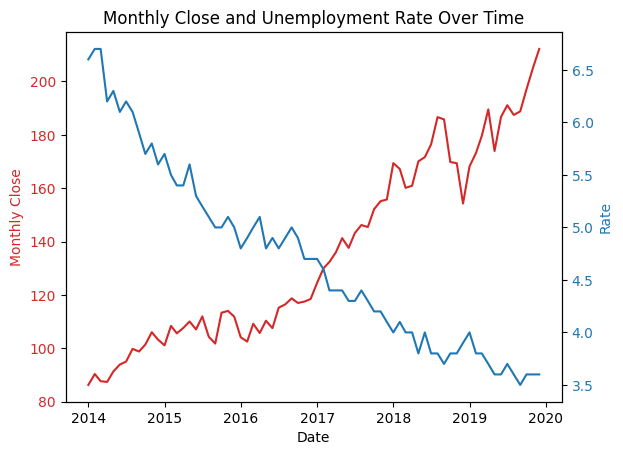

In [19]:

# Combine 'Year' and 'Month' into a 'Date' for plotting
MonthlyClose_Unemploy_df['Date'] = pd.to_datetime(MonthlyClose_Unemploy_df['Year'].astype(str) + ' ' + MonthlyClose_Unemploy_df['Month'])

# Plotting
fig, ax1 = plt.subplots()

# Create first plot - Monthly Close
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Monthly Close', color=color)
ax1.plot(MonthlyClose_Unemploy_df['Date'], MonthlyClose_Unemploy_df['Monthly_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the Rate data
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Rate', color=color)  
ax2.plot(MonthlyClose_Unemploy_df['Date'], MonthlyClose_Unemploy_df['Rate'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.title('Monthly Close and Unemployment Rate Over Time')
plt.show()
